  # 🔴Netflix Visualization, EDA🍿

The dataset contains metadata regarding movies and TV shows, including information like the title, director, and cast. It also includes details such as the release year, rating, and duration. To begin, we'll load the dataset and generate some new features. In this analysis, I've examined the dataset to uncover key insights and findings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
netflix=pd.read_csv('netflix_titles.csv')

In [3]:
netflix

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

#  Data Preprocessing

1)In the data preprocessing phase, our first task was to examine the shape of the data to understand its dimensions.             
2)Next, we conducted a check for null values within the dataset and promptly removed any that were found.                       
3)Additionally, we meticulously searched for duplicate values and replaced them to ensure the integrity of the data.             
4)To gain insights into the relationships between different variables, we visualized the correlation map using a heatmap.       
5)This visualization technique allowed us to identify patterns and dependencies among the features in the dataset.              
6)By understanding the interplay between various attributes, we gained valuable insights into the data's underlying structure and relationships.

In [7]:
netflix.head(5)

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [8]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [10]:
netflix.shape

(8807, 12)

In [11]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

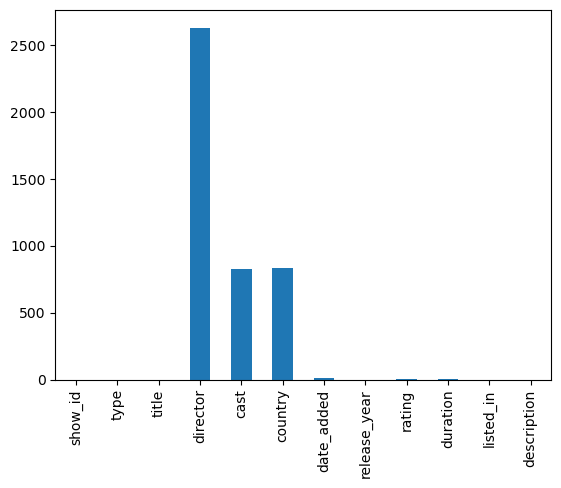

In [13]:
netflix.isnull().sum().plot(kind='bar')

In [16]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [24]:
netflix.duplicated().sum()

0

No duplicate value is present

# make a copy of the dataset

In [4]:
df=netflix.copy()

Dealing with null values

In [5]:
df=df.dropna()
df.shape

(5332, 12)

convert date time format

In [6]:
df['date_added']=pd.to_datetime(df['date_added'])
df['day_added']=df['date_added'].dt.day
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['year_added'].astype(int);
df['day_added'].astype(int);

In [6]:
df.head(5)

show_id     type                          title             director  \
7       s8    Movie                        Sankofa         Haile Gerima   
8       s9  TV Show  The Great British Baking Show      Andy Devonshire   
9      s10    Movie                   The Starling       Theodore Melfi   
12     s13    Movie                   Je Suis Karl  Christian Schwochow   
24     s25    Movie                          Jeans           S. Shankar   

                                                 cast  \
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24  Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   

                                              country date_added  \
7   United States, Ghana, Burkina Faso, United Kin... 2021-09-24   
8                                      United Kingdom 2021-09-24   
9                                       United States 2021-09-24   
12                            Germany, Czech Republic 2021-09-23   
24                                              India 2021-09-21   

    release_year rating   duration  \
7           1993  TV-MA    125 min   
8           2021  TV-14  9 Seasons   
9           2021  PG-13    104 min   
12          2021  TV-MA    127 min   
24          1998  TV-14    166 min   

                                           listed_in  \
7   Dramas, Independent Movies, International Movies   
8                       British TV Shows, Reality TV   
9                                   Comedies, Dramas   
12                      Dramas, International Movies   
24   Comedies, International Movies, Romantic Movies   

                                          description  day_added  year_added  \
7   On a photo shoot in Ghana, an American model s...         24        2021   
8   A talented batch of amateur bakers face off in...         24        2021   
9   A woman adjusting to life after a loss contend...         24        2021   
12  After most of her family is murdered in a terr...         23        2021   
24  When the father of the man she loves insists t...         21        2021   

    month_added  
7             9  
8             9  
9             9  
12            9  
24            9

# Data Visualization

Movies vs Tv shows

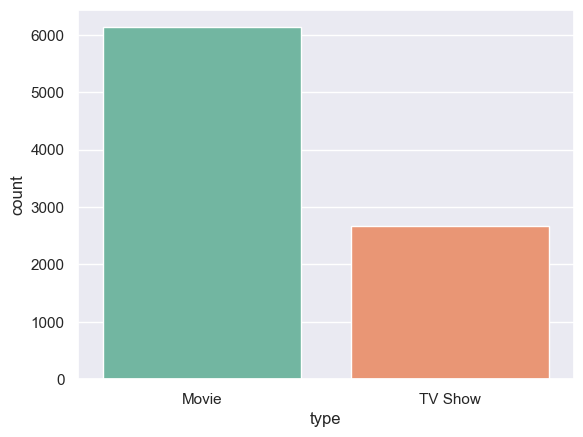

In [8]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix, palette="Set2")


Netflix has more movies than TV shows.

Rating of movies

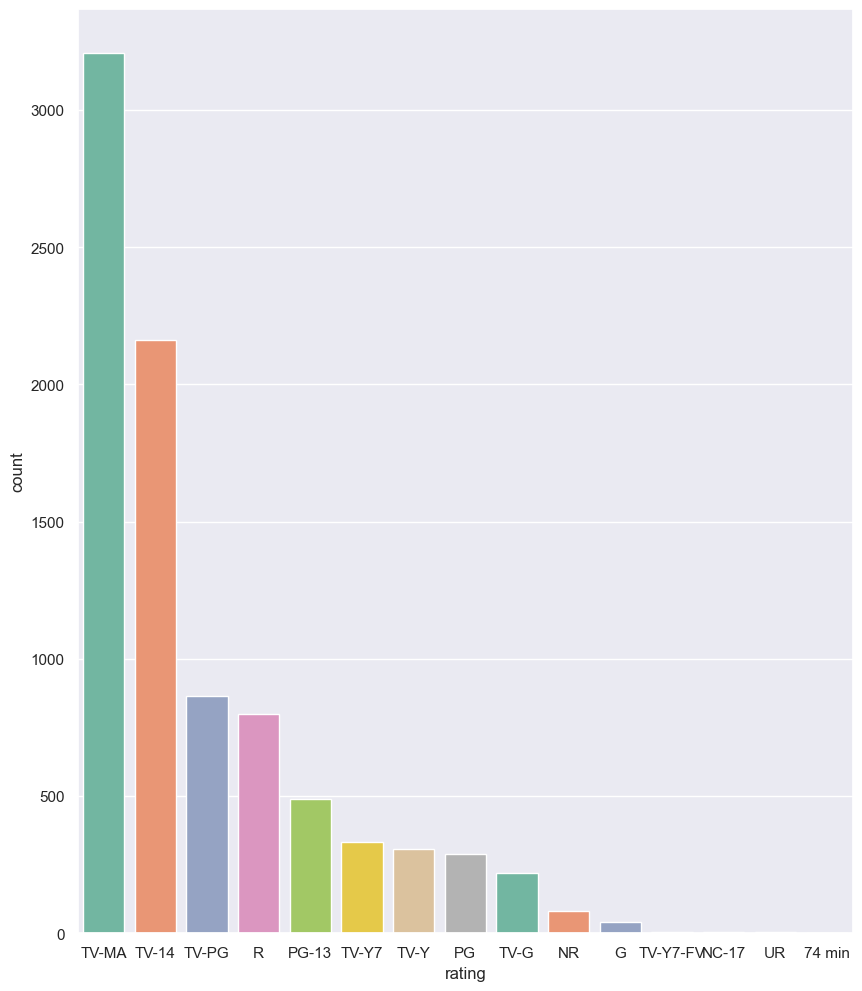

In [16]:
plt.figure(figsize=(10,12))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix, palette="Set2", order=netflix['rating'].value_counts().index[0:15])

The most prevalent rating for movies on Netflix is 'TV-MA', intended for mature audiences. Following that is 'TV-14', suitable for viewers aged 14 and above. The third most common rating for movies on Netflix is 'TV-PG', which means "Parental Guidance Suggested."

Relation between Type and Rating

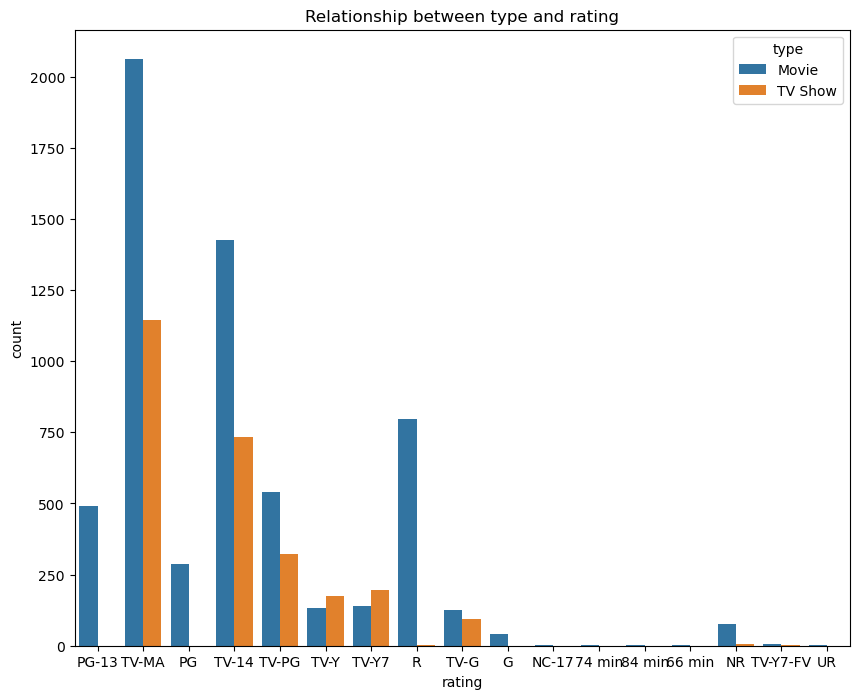

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=netflix)
plt.title('Relationship between type and rating')
plt.show()

 
Movies: PG-13, TV-MA, R target older audiences, while also catering to a broader range with PG, TV-PG, TV-G, NR. TV shows lean towards younger audiences with TV-Y, TV-Y7, but also cover a range with TV-G, TV-PG, TV-14, TV-MA. This reflects how movies often target specific demographics, while TV shows have broader appeal depending on genre and content.

        Pie chart for the type: Movies and Tv shows

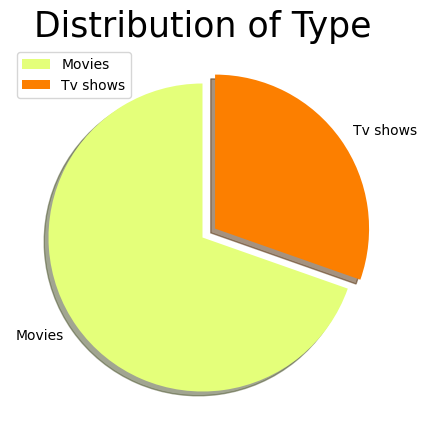

In [12]:
labels=['Movies','Tv shows']
size=netflix['type'].value_counts()
colors=plt.cm.Wistia(np.linspace(0,1,2))
explode=[0,0.1]
plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()



On Netflix, there are more movies available than TV shows.


Pie-chart for rating

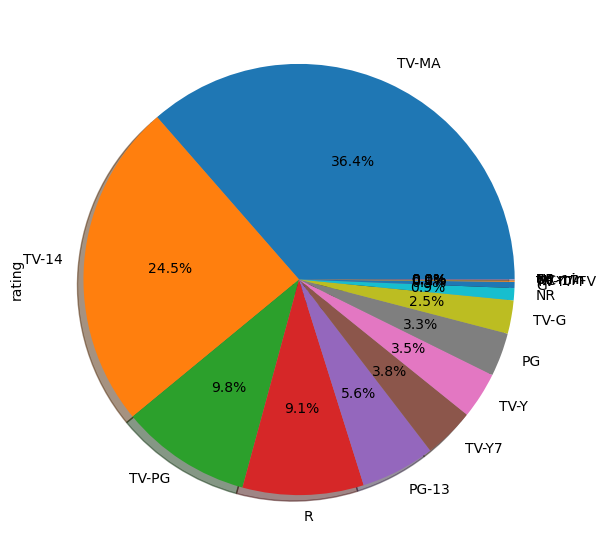

In [21]:
netflix['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(7,7))
plt.show()

According to the chart, TV-MA has the highest rating, followed by TV-14, TV-PG, R, PG-13, TV-Y7, TV-Y, PG, TV-G, NR, and so on.


Top rated 10 movies on Netflix are:

Countries with highest rated content.

In [6]:
import plotly.express as px
data = dict(
    number=[1063,619,135,60,44,41,40,40,38,35],
    country=["United States", "India", "United Kingdom", "Canada", "Spain",'Turkey','Philippines','France','South Korea','Australia'])
fig = px.funnel(data, x='number', y='country')
fig.show()

# Year wise analysis

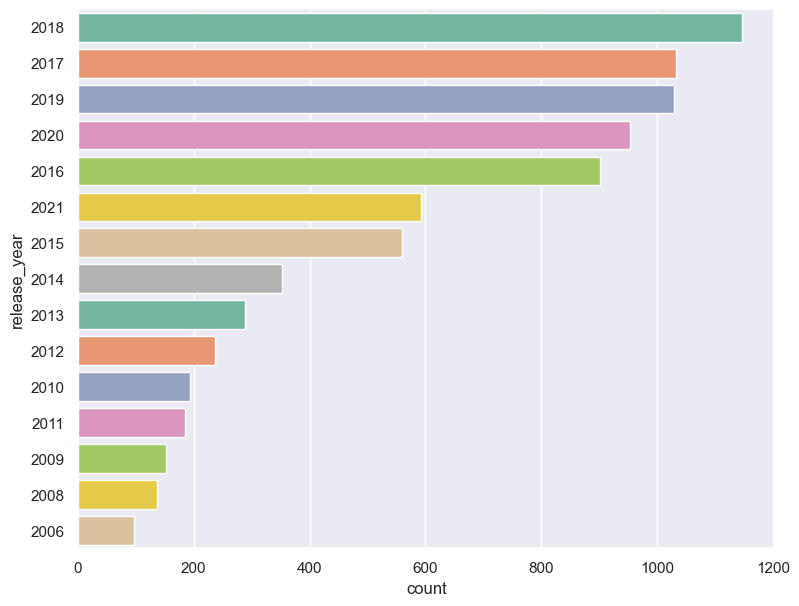

In [38]:
plt.figure(figsize=(9,7))
sns.set(style='darkgrid')
ax=sns.countplot(y='release_year',data=netflix,palette='Set2',order=netflix['release_year'].value_counts().index[0:15])

This shows there are more movies are released in netflix in the year of 2018

# Top 10 directors movies

In [23]:
top_10_directors_movies=df['director'][df['type']=='Movie'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_directors_movies = top_10_directors_movies.rename(columns={'index': 'Director', 'director': 'Movies_count'})
top_10_directors_movies

Director  Movies_count
0  Raúl Campos, Jan Suter            18
1            Marcus Raboy            14
2               Jay Karas            14
3     Cathy Garcia-Molina            13
4             Jay Chapman            12
5         Youssef Chahine            12
6         Martin Scorsese            12
7        Steven Spielberg            11
8        Don Michael Paul            10
9            David Dhawan             9

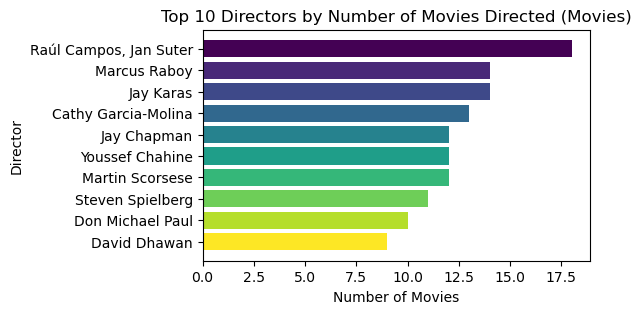

In [24]:
num_colors = len(top_10_directors_movies)
colors = plt.cm.viridis(np.linspace(0, 1, num_colors))
plt.figure(figsize=(5, 3))
plt.barh(top_10_directors_movies['Director'], top_10_directors_movies['Movies_count'], color=colors)
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.title('Top 10 Directors by Number of Movies Directed (Movies)')
plt.gca().invert_yaxis()# Invert y-axis to have the director with the most movies at the top
plt.show()

# Top 10 directors Tv show

In [21]:
top_10_director_tv_show=df['director'][df['type']=='TV Show'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_director_tv_show=top_10_director_tv_show.rename(columns={'index':'Director','director':'TV shows_count'})
top_10_director_tv_show

Director  TV shows_count
0  Alastair Fothergill               3
1       Iginio Straffi               2
2      Rob Seidenglanz               2
3          Shin Won-ho               2
4          Stan Lathan               2
5      Simon Frederick               1
6       Daniel Minahan               1
7      Takuya Igarashi               1
8          Ally Pankiw               1
9            Jay Oliva               1

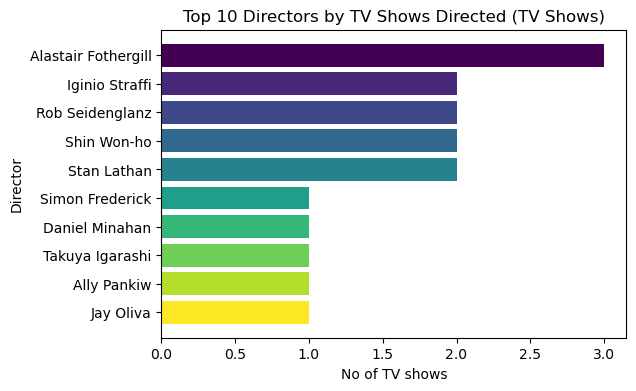

In [22]:
num_colors=len(top_10_director_tv_show)
colors=plt.cm.viridis(np.linspace(0,1,num_colors))
plt.figure(figsize=(6,4))
plt.barh(top_10_director_tv_show['Director'],top_10_director_tv_show['TV shows_count'],color=colors)
plt.xlabel('No of TV shows')
plt.ylabel('Director')
plt.title('Top 10 Directors by TV Shows Directed (TV Shows)')
plt.gca().invert_yaxis()
plt.show()

# Top 10 Countries Movie

In [20]:
top10_countries_movie=df['country'][df['type']=='Movie'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top10_countries_movie=top10_countries_movie.rename(columns={'index':'Country','country':'Movies_count'})
top10_countries_movie

Country  Movies_count
0   United States          1819
1           India           868
2  United Kingdom           164
3          Canada           104
4           Egypt            90
5         Nigeria            84
6           Spain            84
7       Indonesia            76
8          Turkey            74
9           Japan            73

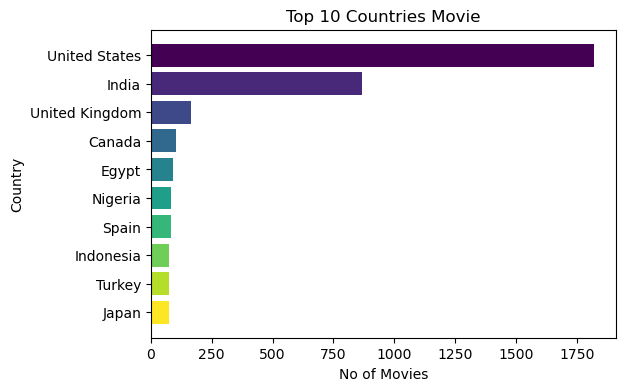

In [32]:
num_colors=len(top10_countries_movie)
colors=plt.cm.viridis(np.linspace(0,1,num_colors))
plt.figure(figsize=(6,4))
plt.barh(top10_countries_movie['Country'],top10_countries_movie['Movies_count'],color=colors)
plt.xlabel('No of Movies')
plt.ylabel('Country')
plt.title('Top 10 Countries Movie')
plt.gca().invert_yaxis()
plt.show()

# Top 10 countries tv show

In [27]:
top10_countries_tvshow=df['country'][df['type']=='TV Show'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top10_countries_tvshow=top10_countries_tvshow.rename(columns={'index':'Country','country':'TV Show count'})
top10_countries_tvshow

Country  TV Show count
0   United States             27
1  United Kingdom             19
2           Japan             10
3     South Korea             10
4           Spain              7
5           India              7
6          Taiwan              7
7          France              5
8          Turkey              5
9        Thailand              5

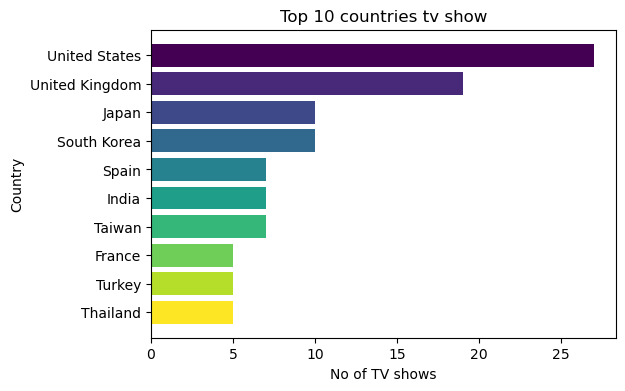

In [31]:
num_colors=len(top10_countries_tvshow)
colors=plt.cm.viridis(np.linspace(0,1,num_colors))
plt.figure(figsize=(6,4))
plt.barh(top10_countries_tvshow['Country'],top10_countries_tvshow['TV Show count'],color=colors)
plt.xlabel('No of TV shows')
plt.ylabel('Country')
plt.title('Top 10 countries tv show')
plt.gca().invert_yaxis()
plt.show()

# Top 10 Rating Movie

In [34]:
top10_rating_movie=df['rating'][df['type']=='Movie'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top10_rating_movie=top10_rating_movie.rename(columns={'index':'Rating','rating':'Movie count'})
top10_rating_movie

Rating  Movie count
0  TV-MA         1741
1  TV-14         1177
2      R          778
3  PG-13          470
4  TV-PG          416
5     PG          275
6   TV-G           81
7   TV-Y           71
8  TV-Y7           70
9     NR           58

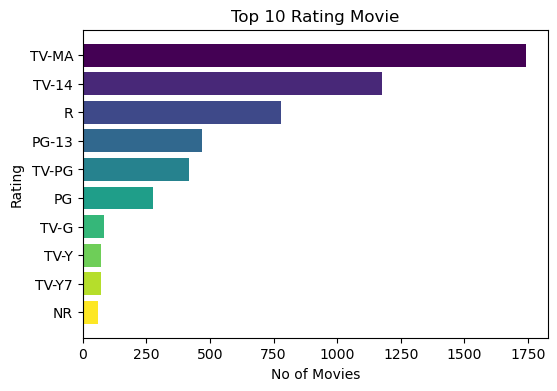

In [35]:
num_colors=len(top10_rating_movie)
colors=plt.cm.viridis(np.linspace(0,1,num_colors))
plt.figure(figsize=(6,4))
plt.barh(top10_rating_movie['Rating'],top10_rating_movie['Movie count'],color=colors)
plt.xlabel('No of Movies')
plt.ylabel('Rating')
plt.title('Top 10 Rating Movie')
plt.gca().invert_yaxis()
plt.show()

# Top 10 rating TV Show

In [10]:
top10_rating_tvshow=df['rating'][df['type']=='TV Show'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top10_rating_tvshow=top10_rating_tvshow.rename(columns={'index':'Rating','rating':'TV show count'})
top10_rating_tvshow

Rating  TV show count
0  TV-MA             81
1  TV-14             37
2  TV-PG             15
3  TV-Y7              6
4   TV-Y              5
5   TV-G              3

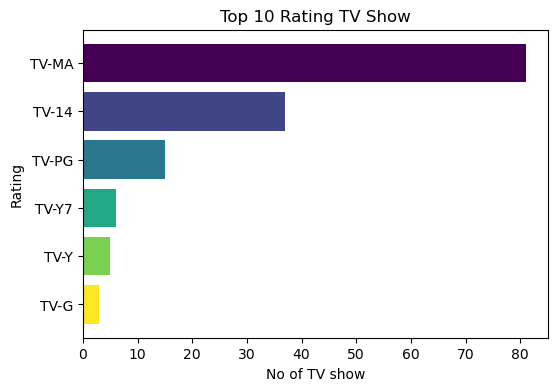

In [12]:
num_colors=len(top10_rating_tvshow)
colors=plt.cm.viridis(np.linspace(0,1,num_colors))
plt.figure(figsize=(6,4))
plt.barh(top10_rating_tvshow['Rating'],top10_rating_tvshow['TV show count'],color=colors)
plt.xlabel('No of TV show')
plt.ylabel('Rating')
plt.title('Top 10 Rating TV Show')
plt.gca().invert_yaxis()
plt.show()

# Top 10 Category movie

In [8]:
top10_category_movie=df['listed_in'][df['type']=='Movie'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top10_category_movie=top10_category_movie.rename(columns={'index':'Category','listed_in':'Movie count'})

top10_category_movie

Category  Movie count
0                      Dramas, International Movies          336
1                                   Stand-Up Comedy          286
2            Comedies, Dramas, International Movies          257
3  Dramas, Independent Movies, International Movies          243
4                Children & Family Movies, Comedies          179
5     Dramas, International Movies, Romantic Movies          160
6                                     Documentaries          156
7                    Comedies, International Movies          152
8   Comedies, International Movies, Romantic Movies          143
9                                            Dramas          133

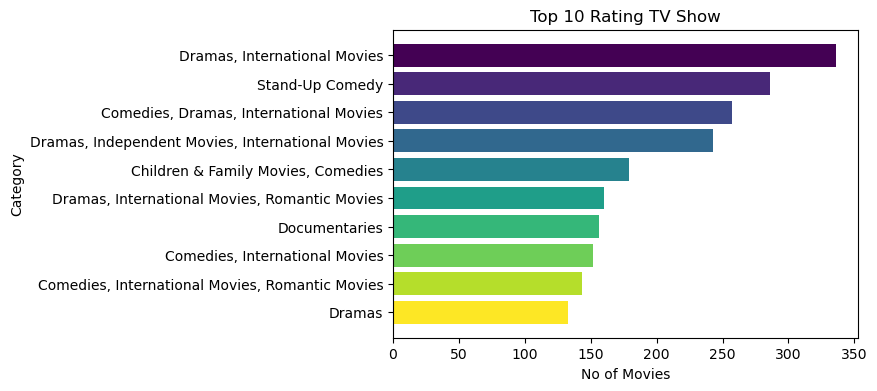

In [9]:
num_colors=len(top10_category_movie)
colors=plt.cm.viridis(np.linspace(0,1,num_colors))
plt.figure(figsize=(6,4))
plt.barh(top10_category_movie['Category'],top10_category_movie['Movie count'],color=colors)
plt.xlabel('No of Movies')
plt.ylabel('Category')
plt.title('Top 10 Rating TV Show')
plt.gca().invert_yaxis()
plt.show()

# Top 10 Category TV Show

In [7]:
top10_category_tvshow=df['listed_in'][df['type']=='TV Show'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top10_category_tvshow=top10_category_tvshow.rename(columns={'index':'Category','listed_in':'TV Show Count'})

top10_category_tvshow

Category  TV Show Count
0  Crime TV Shows, International TV Shows, TV Dramas             17
1                  International TV Shows, TV Dramas              6
2  International TV Shows, Romantic TV Shows, TV ...              6
3          Stand-Up Comedy & Talk Shows, TV Comedies              6
4               Anime Series, International TV Shows              5
5                              Kids' TV, TV Comedies              5
6  International TV Shows, Korean TV Shows, Roman...              5
7                                           TV Shows              5
8  Crime TV Shows, International TV Shows, Spanis...              4
9                                           Kids' TV              4

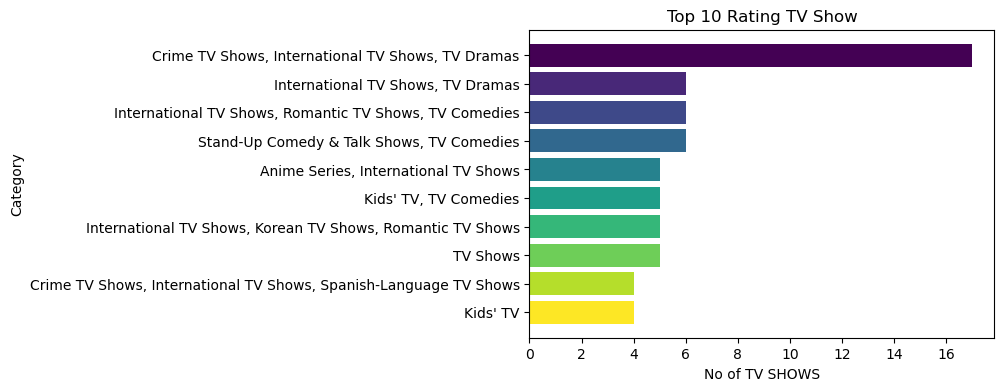

In [10]:
num_colors=len(top10_category_tvshow)
colors=plt.cm.viridis(np.linspace(0,1,num_colors))
plt.figure(figsize=(6,4))
plt.barh(top10_category_tvshow['Category'],top10_category_tvshow['TV Show Count'],color=colors)
plt.xlabel('No of TV SHOWS')
plt.ylabel('Category')
plt.title('Top 10 Rating TV Show')
plt.gca().invert_yaxis()
plt.show()

# Word Cloud 

In [15]:
from wordcloud import WordCloud

# Country

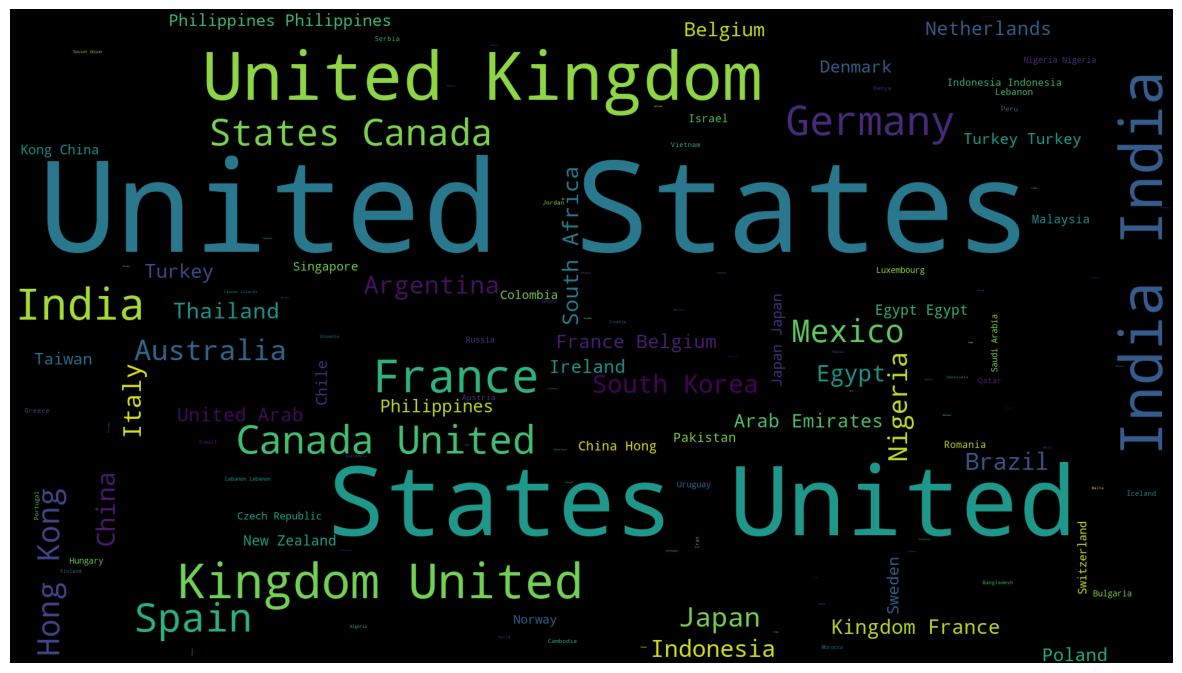

In [25]:
text=" ".join(df.country)

wordcloud=WordCloud(width=1920,height=1080,background_color='black').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


# word cloud Director

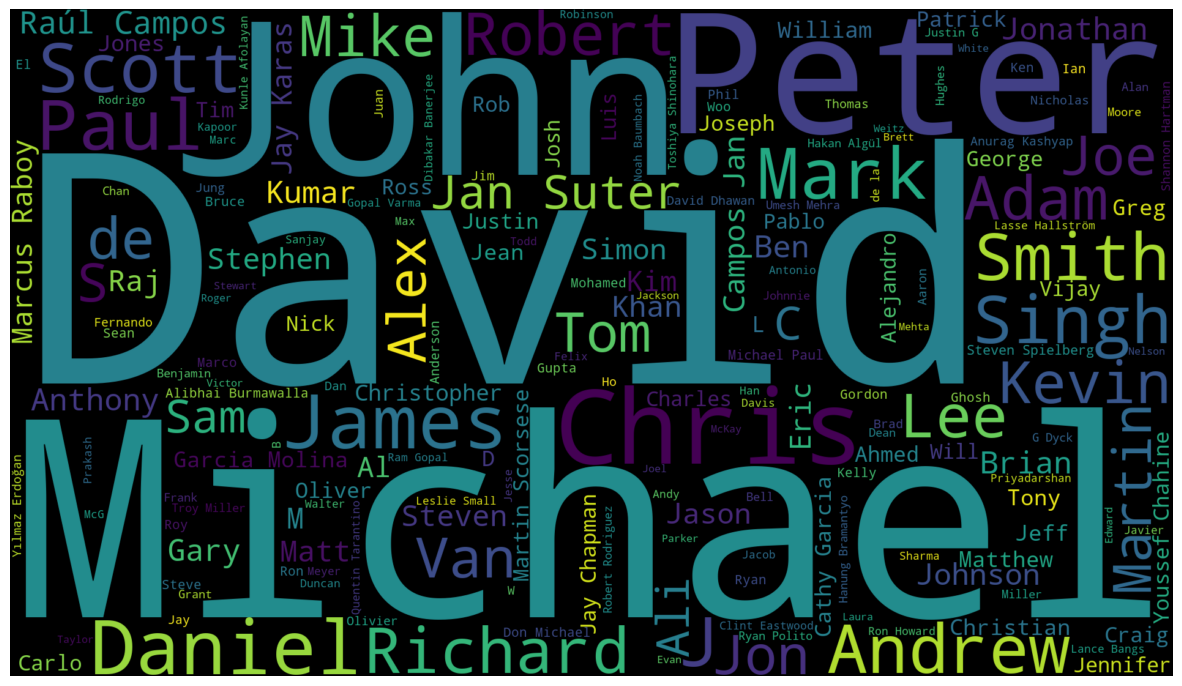

In [29]:
text=" ".join(df.director)

wordcloud=WordCloud(width=1900,height=1090,background_color='black').generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Word Cloud Category

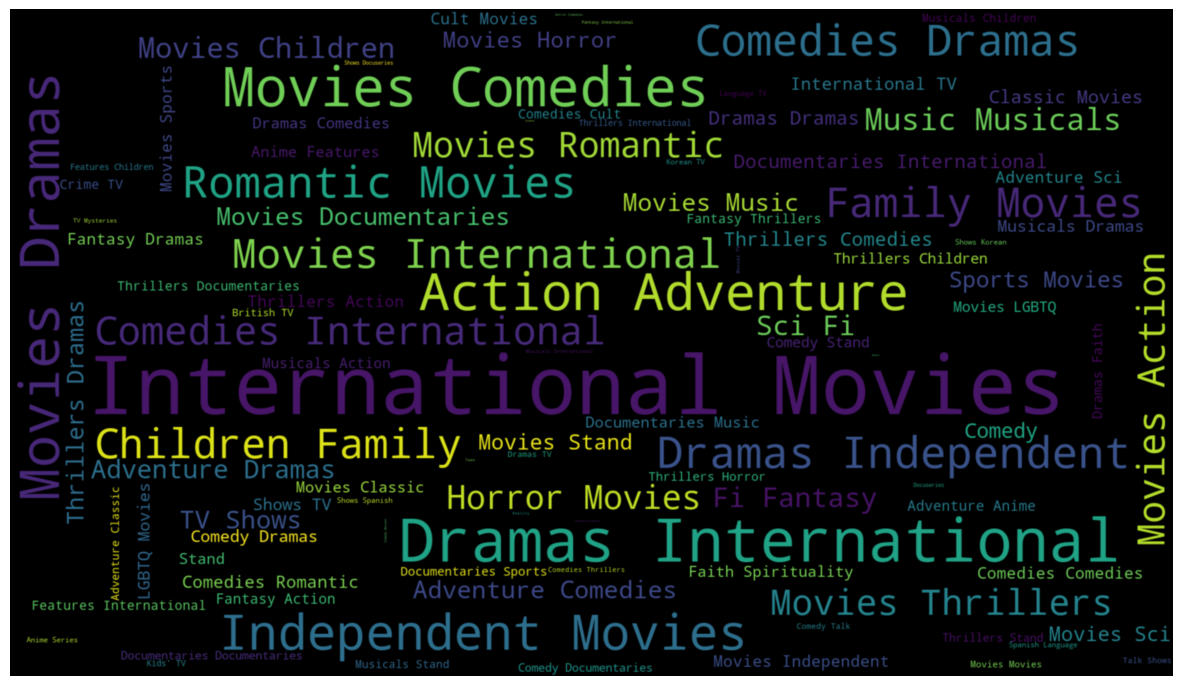

In [31]:
text=" ".join(df.listed_in)

wordcloud=WordCloud(width=1900,height=1090,background_color='black').generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bicubic')
plt.axis('off')
plt.show()